# TimeSeries Forecasting with Facebook Prophet
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

## Import Libraries
Python Library Import
- import pandas as pd
- from fbprophet import Prophet
- import matplotlib.pyplot as plt


In [32]:
pd:.p.import[`pandas];
np:.p.import[`numpy];
Prophet:.p.import[`fbprophet][`:Prophet];
plt:.p.import[`matplotlib.pyplot];
dateTime:.p.import[`datetime]`:date;

## Load/Prep Environment
Load NYSE Kaggle data

In [8]:
\c 200 200
printSep:{100#"="}
nyseDataDir:sv[`;] each `:NYSE_data,/: key `:NYSE_data
/readInData:{((count "," vs first read0 x)#"*";enlist ",") 0: x}
/nyseFundamental_pre:readInData nyseDataDir 0
nysePriceSplit_pre:("PSFFFFF";enlist ",") 0: nyseDataDir 1
/nysePrice_pre:("PSFFFFF";enlist ",") 0: nyseDataDir 2
/nyseSecurities_pre:readInData nyseDataDir 3
first nysePriceSplit_pre

date  | 2016.01.05D00:00:00.000000000
symbol| `WLTW
open  | 123.43
close | 125.84
low   | 122.31
high  | 126.25
volume| 2163600f


## Data Handling

### Inspection of Data

In [13]:
10#aaplData:select from nysePriceSplit_pre where symbol = `AAPL

date                          symbol open     close    low      high     volume       
--------------------------------------------------------------------------------------
2010.01.04D00:00:00.000000000 AAPL   30.49    30.57286 30.34    30.64286 1.234324e+008
2010.01.05D00:00:00.000000000 AAPL   30.65714 30.62571 30.46428 30.79857 1.504762e+008
2010.01.06D00:00:00.000000000 AAPL   30.62571 30.13857 30.10714 30.74714 1.3804e+008  
2010.01.07D00:00:00.000000000 AAPL   30.25    30.08286 29.86429 30.28572 1.192828e+008
2010.01.08D00:00:00.000000000 AAPL   30.04286 30.28286 29.86572 30.28572 1.119027e+008
2010.01.11D00:00:00.000000000 AAPL   30.4     30.01571 29.77857 30.42857 1.155574e+008
2010.01.12D00:00:00.000000000 AAPL   29.88428 29.67429 29.48857 29.96714 1.486149e+008
2010.01.13D00:00:00.000000000 AAPL   29.69572 30.09286 29.15714 30.13286 1.51473e+008 
2010.01.14D00:00:00.000000000 AAPL   30.01571 29.91857 29.86    30.06571 1.082235e+008
2010.01.15D00:00:00.000000000 AAPL   30.132

Before we can throw the data to be plotted, we have to process the dates.
<br> To keep it simple, we use the avg price between highs and lows.

In [29]:
3#'processedData:exec date.date, midPrice:avg each (high,'low) from aaplData

date    | 2010.01.04 2010.01.05 2010.01.06
midPrice| 30.49143   30.63143   30.42714  


### Visualise the Data

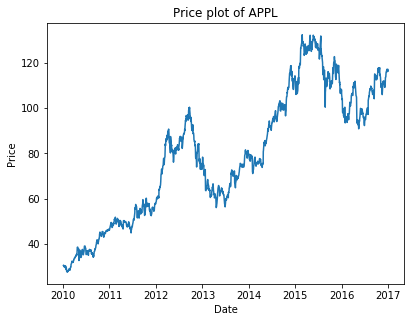

In [42]:
/here we keep the date in python format and process it into a 
plotData:{
    pydates:np[`:array][<;] {dateTime[>;x 0;x 1;x 2]} each "J"$"." vs' string x[`date];
    plt[`:plot][pydates;x`midPrice];
    plt[`:xlabel]["Date"];
    plt[`:ylabel]["Price"];
    plt[`:title]["Price plot of ",string y];
    plt[`:show][];
 }
plotData[processedData;`APPL]

Here we see some general trend and random spikes
<br>We will try to use Prophet to forecast forward

## Forecast


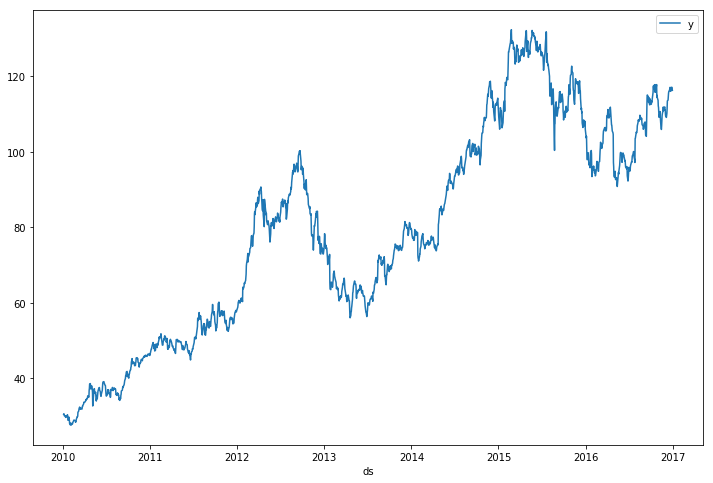

In [80]:
/To use Prophet, the date partition must be ds and target is y
prepProphetData:{
    ProphetData:pd[`:DataFrame] `ds`y!({dateTime[>;x 0;x 1;x 2]} each "J"$"." vs' string x[`date];x`midPrice)
 }

/using Pandas instead of numpy for array management

ProphetData:prepProphetData[processedData]
ProphetData:ProphetData[`:set_index]["ds"];
ProphetData[`:plot][`figsize pykw (12;8)];
plt[`:show][];


### Training of The Data

In [82]:
/Trains The data with Prophet, Prophet picks the best model through iteration
my_model:Prophet[`interval_width pykw 0.95;`daily_seasonality pykw 1b];
ProphetData:prepProphetData[processedData];
ProphetData;
my_model:my_model[`:fit][ProphetData]

Initial log joint probability = -11.9941
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4169.86     0.0414669          1788      0.8505      0.8505      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4343.73    0.00595578       590.954      0.3068      0.3068      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4462.54     0.0108588       544.176           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4493.33     0.0199218       1715.77           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4521.54   0.000862193       467.048      0.7316      0.7316      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

### Predicting with Trained Forecast
Here we try to predict 30 days in advance, ignoring holiday and weekends, freq as daily

In [95]:
futureDates:my_model[`:make_future_dataframe][`periods pykw 30]
print futureDates[`:tail][]
forecast:my_model[`:predict][futureDates]
print forecast[`:tail][]

             ds
1787 2017-01-25
1788 2017-01-26
1789 2017-01-27
1790 2017-01-28
1791 2017-01-29
             ds       trend  trend_lower  trend_upper  yhat_lower  yhat_upper  \
1787 2017-01-25  100.749771    99.750124   101.931817   87.816469  105.203293   
1788 2017-01-26  100.730581    99.683541   102.001382   87.540958  105.609174   
1789 2017-01-27  100.711391    99.583307   102.035488   88.366567  104.991661   
1790 2017-01-28  100.692201    99.523318   102.068740   88.191478  105.413698   
1791 2017-01-29  100.673011    99.420162   102.125062   87.782354  105.348419   

         daily  daily_lower  daily_upper  seasonal    ...      seasonalities  \
1787  1.418037     1.418037     1.418037 -3.980719    ...          -3.980719   
1788  1.418037     1.418037     1.418037 -4.045385    ...          -4.045385   
1789  1.418037     1.418037     1.418037 -4.156084    ...          -4.156084   
1790  1.418037     1.418037     1.418037 -4.259918    ...          -4.259918   
1791  1.418037   

## Inspection of Prediction and Confidence Interval
With Prophet, we can use the inbuilt functions to quickly plot the given forecast
<br> At the end of the plot without points are the forecasts


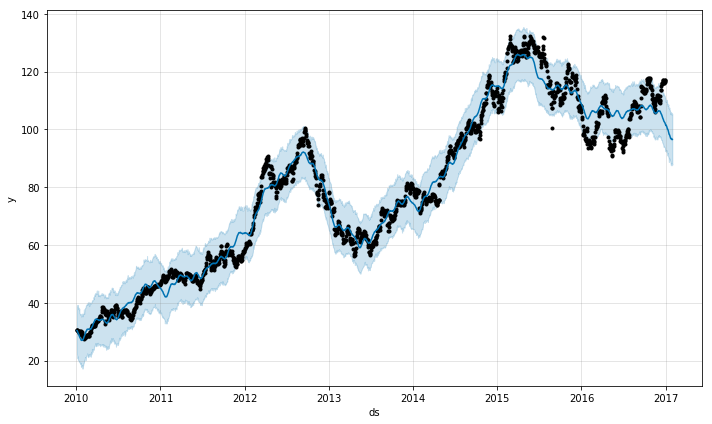

In [96]:
my_model[`:plot][forecast;`uncertainty pykw 1b];
plt[`:show][];

### Detailed Analysis of components
Given the plots, it can be seen that there was a general upward trend
- As for yearly seasonality, it might be explained that stock market is usually bullish after july
- As for weekly seasonality, it might be explained that stock market is usually active in the middle of the week as it works up and works down through the week
- It is suspected that the daily seasonality will have little use due to the daily data

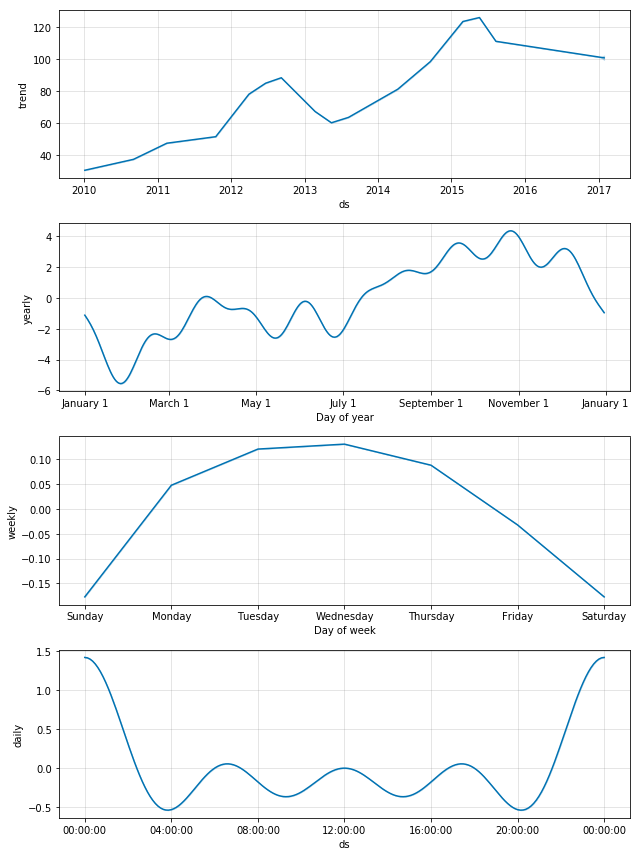

In [97]:
my_model[`:plot_components] forecast;
plt[`:show][];

### Comparing against actual results
With all prediction, we are more concern if the model was able to forecast forward
<br> Fortunately, we have actual data to compare the last 30 data
<br> Here we extract the last 30 data and manipulate them in q to obtain the forecasted error

In [125]:
/Manipulation of Forecast
qforecast:forecast[`:yhat][`:tail][30][`:tolist][]`
qforecast:`Date`qforecast!(last[processedData`date]+1+til 30;qforecast)
5#'qforecast
(first qforecast`Date;last qforecast`Date)

Date     | 2016.12.31 2017.01.01 2017.01.02 2017.01.03 2017.01.04
qforecast| 101.4831   101.3323   101.4012   101.3109   101.1489  


2016.12.31 2017.01.29


In [145]:
/Download actual price
/Manually download actual prices
5#actualPrice:("DFFFFF";enlist ",") 0: `:NYSE_data/AAPL.csv
2#actualPrice:select Date, midPrice:avg each (High,'Low) from actualPrice
3_10#actualPrice:update fills midPrice from flip[qforecast] lj 1!actualPrice
enlist["Forecast Error"]!enlist sqrt avg exec (qforecast-midPrice)xexp 2 from actualPrice where not null midPrice

Date       Open   High   Low    Close  Adj Close
------------------------------------------------
2016.12.30 116.65 117.2  115.43 115.82 113.088  
2017.01.03 115.8  116.33 114.76 116.15 113.4103 
2017.01.04 115.85 116.51 115.75 116.02 113.2833 
2017.01.05 115.92 116.86 115.81 116.61 113.8594 
2017.01.06 116.78 118.16 116.47 117.91 115.1288 


Date       midPrice
-------------------
2016.12.30 116.315 
2017.01.03 115.545 


Date       qforecast midPrice
-----------------------------
2017.01.03 101.3109  115.545 
2017.01.04 101.1489  116.13  
2017.01.05 100.9244  116.335 
2017.01.06 100.6107  117.315 
2017.01.07 100.2607  117.315 
2017.01.08 100.0437  117.315 
2017.01.09 100.0403  118.685 


"Forecast Error"| 21.09465


## Conclusion

It seems that as intuitive as prophet, timeseries forecasting for stock prices will need more tweaking from the user.
<br> The largest mistake is from prophet anticipating a slow downward trend but the actual prices spiked up